======== Start Testing ======> Running learning rate: 1


W mean value is 3.9953091408894026
b mean value is 4.979968013637159
<tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([1.])> <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([1.])>
Still running, current step is: 500
Still running, current step is: 1000
Still running, current step is: 1500
Still running, current step is: 2000
Still running, current step is: 2500
Still running, current step is: 3000
Still running, current step is: 3500
Still running, current step is: 4000
Still running, current step is: 4500
Still running, current step is: 5000
Still running, current step is: 5500
Still running, current step is: 6000
Still running, current step is: 6500
Still running, current step is: 7000
Still running, current step is: 7500
Still running, current step is: 8000
Still running, current step is: 8500
Still running, current step is: 9000
Still running, current step is: 9500
Still running, current step i

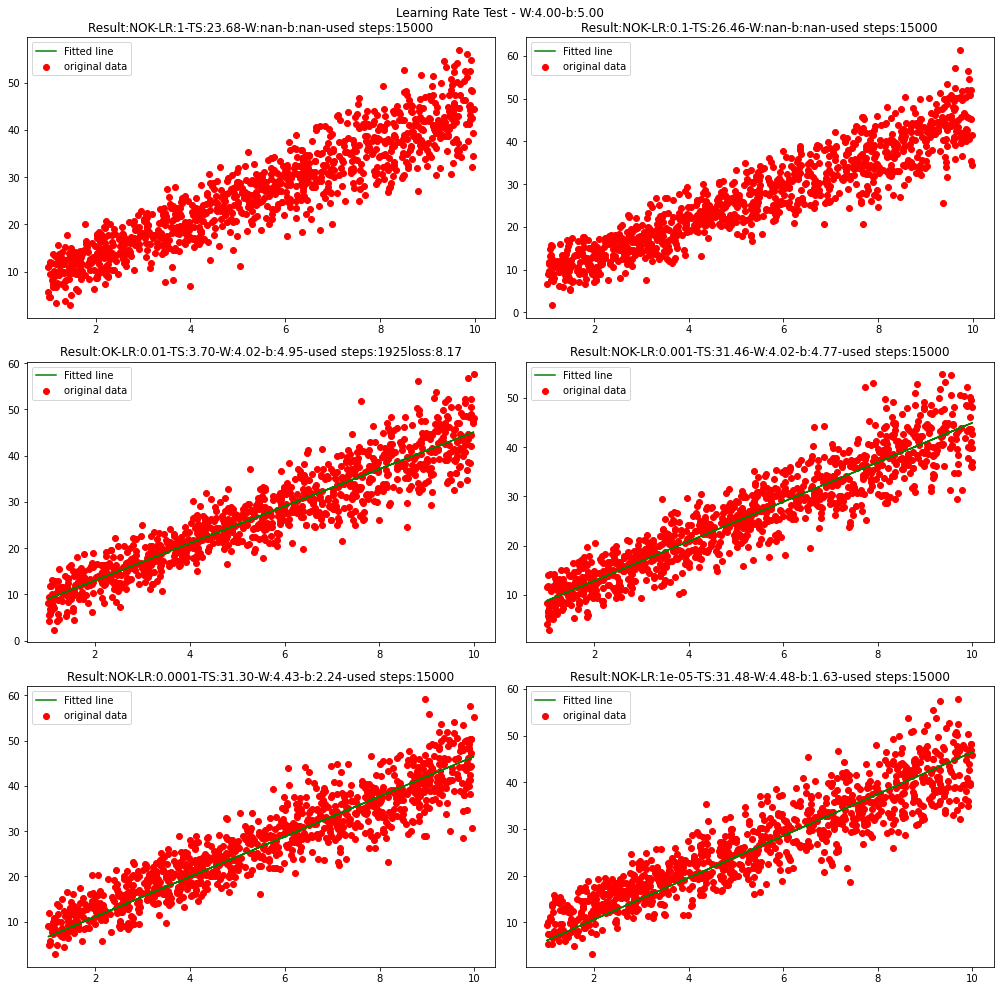

In [4]:
# V3 is reusing TF linear regression class, however, each time for different learning_rate, there is different set of random data
# learning_rate is one parameter to be initialized in class

# From comparison, the different set of random data doesn't impact the performance 
# From result, 0.01 is good learning rate for TF based on the type of data generated. Other values most of the time won't converge for TF


import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

# This program is going to try to test with linear regression using tensor flow. The object is to determine the optimum learning rate.

class TF_linear_regression:
    def __init__(self, w_loc,w_scale,b_loc,b_scale,x1,x2,w_init,b_init, n_samples,learning_rate):
        self.learning_rate=learning_rate # the learning rate to use in linear regression model
        self.n_samples=n_samples # number of samples to be used for training data

        # generate random distribution of w and b using normal distribution 
        w_dis = np.random.normal(w_loc, w_scale, n_samples) #given a range, generate samples for w
        b_dis = np.random.normal(b_loc, b_scale, n_samples) #given a range, generate samples for b

        self.w_constant = np.mean(w_dis) # get mean of w
        self.b_constant = np.mean(b_dis) # get mean of b

        print("W mean value is", self.w_constant)
        print("b mean value is", self.b_constant)

        # construct input X and output Y
        self.X = np.random.uniform(x1, x2, n_samples) #given a range, generate samples for x
        self.Y = np.multiply(self.X, w_dis) + b_dis #based on X, W, b, we will have Y (output) as trained data 

        # Define TF variable W and b
        # Instead of using random value, we can use defined initial value of W and b
        self.W = tf.Variable([w_init], dtype=tf.float64) #this W variable is to be determinded by TF
        self.b = tf.Variable([b_init], dtype=tf.float64) #this b variable is to be determinded by TF
        # W = tf.Variable(np.random.randn(1))
        # b = tf.Variable(np.random.randn(1))
        print(self.W, self.b)
        
        self.w_list=[w_init]
        self.b_list=[b_init]

        self.optimizer = tf.optimizers.SGD(learning_rate) #declare optimizer and initialize it with learning rate 

    def linear_regression(self,x):
        return self.W*x+self.b # construct linear regression model 

    def mean_square(self,y_pred,y_value):
        return tf.reduce_sum(tf.pow(y_pred-y_value,2))/(2*self.n_samples) # calculate mean square 

    def run_optimization(self):
        with tf.GradientTape() as g:
            pred = self.linear_regression(self.X) # based on given X, do a predict
            loss = self.mean_square(pred, self.Y) # calculate the loss 
        gradients = g.gradient(loss, [self.W, self.b]) # use gradient to do differentiation of loss over W and b
        self.optimizer.apply_gradients(zip(gradients, [self.W, self.b])) # update W and b 
        self.w_list.append(self.W.numpy()[0])
        self.b_list.append(self.b.numpy()[0])

def main(argv): # use main function to draw figure and compare 
    learning_rate = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001] #the learning rate we want to study
    Cols=2 # number of columes in the figure 
    testResult = "NOK" # identify if the test is OK or not 
    Tot = len(learning_rate)
    training_step = 15000 # specify training steps 
    used_step= 5000 # this is for figure plot 
    display_step = 500 # to control the display step number 
    Rows = Tot // Cols # determine how many rows of subplots in the figure 
    Rows += Tot % Cols # the extra row if it's not divided 
    w_loc=4 #local value of w
    w_scale=0.5 #scale of w
    b_loc=5 #local value of b
    b_scale=3 # scale of b
    x_low=1 #low range of x samples 
    x_high=10 #high range of x samples 
    W_initial=1 #initial value of W
    b_initial=1 # initial value of b 
    n_samples=1000 #number of samples 
    loss_value=0.0

    fig=plt.figure(figsize=(14,14))
    fig.suptitle('Learning Rate Test - W:'+ '%.2f'%w_loc+'-b:'+'%.2f'%b_loc)
    for i in range(Tot):
        testResult = "NOK" # reset test result mark each iteration
        loss_value=0.0
        print("======== Start Testing ======> Running learning rate:", learning_rate[i])
        print("\n")
        tf_lr = TF_linear_regression(w_loc,w_scale,b_loc,b_scale,x_low,x_high,W_initial,b_initial,n_samples,learning_rate[i]) # Initialize a object based on defined class 
        start = time.time()
        for step in range(1, training_step + 1):
            tf_lr.run_optimization()
            if step % display_step == 0:
                print("Still running, current step is:", step)
            if (abs(tf_lr.W - w_loc) < 0.05) & (abs(tf_lr.b-b_loc) < 0.05): #stop execution if w and b are within 5% range
                pred = tf_lr.linear_regression(tf_lr.X)
                loss = tf_lr.mean_square(pred, tf_lr.Y)
                print("Running step======>", step)
                print("Step: %i, loss: %f, W: %F, b: %f" % (step, loss, tf_lr.W.numpy(), tf_lr.b.numpy()))
                testResult = "OK"
                loss_value=loss
                used_step=step
                print("Test is OK!")
                break
        if testResult == "NOK": #not converge within given training steps 
            print("The regression doesn't converge!")
            print("After %d steps, W is %.2f, b is %.2f" % (training_step, tf_lr.W, tf_lr.b))
            used_step=training_step
            
        end = time.time()

        spentTime=end-start
        print(f"Runtime of the program is {spentTime}\n\n")
        ax=fig.add_subplot(Rows, Cols, i + 1)
        if testResult=="OK":
            ax.set_title('Result:'+testResult+'-LR:'+str(learning_rate[i])+'-'+'TS:'+ '%.2f' % spentTime+'-W:%.2f'%tf_lr.W+'-b:%.2f'%tf_lr.b+'-used steps:'+str(used_step)+'loss:%.2f'%loss_value)
        else:
            ax.set_title('Result:'+testResult+'-LR:'+str(learning_rate[i])+'-'+'TS:'+ '%.2f' % spentTime+'-W:%.2f'%tf_lr.W+'-b:%.2f'%tf_lr.b+'-used steps:'+str(used_step))
        ax.scatter(tf_lr.X, tf_lr.Y, c='r', label="original data")
        ax.plot(tf_lr.X, np.array(tf_lr.W * tf_lr.X + tf_lr.b), c='g', label='Fitted line')
        ax.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main(sys.argv[1:])